## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Portfolio 1. 

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'Epinions_cleaned_data_portfolio_2') and print out its total length.

In [1]:
# your code and solution
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
epinions = 'data/Epinions_cleaned_data_portfolio_2.csv'
epinionsDF = pd.read_csv(epinions)
#print total length
len(epinionsDF)

2899

The total length according to the output above is: 2899

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

use <em>`.head`</em> to quickly get the grasp of the data. Like getting the surface info of what to expect you would get of the dataframe.

In [3]:
# your code and solution
epinionsDF.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


use <em>`.info`</em> on the other hand to get the Dtype, count number of nulls and the column names of the dataframe.

In [4]:
epinionsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2899 non-null   int64  
 1   timestamp    2899 non-null   int64  
 2   review       2899 non-null   object 
 3   item         2899 non-null   object 
 4   rating       2899 non-null   float64
 5   helpfulness  2899 non-null   float64
 6   gender       2899 non-null   object 
 7   category     2899 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.3+ KB


In [5]:
epinionsDF.corr()

,userId,timestamp,rating,helpfulness
userId,1.000000,-0.036399,0.008164,-0.016841
timestamp,-0.036399,1.000000,0.019860,0.003638
rating,0.008164,0.019860,1.000000,-0.016832
helpfulness,-0.016841,0.003638,-0.016832,1.000000


In [6]:
epinionsDF.isnull().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
dtype: int64

so far, we don't have a null values in our row per category. This is a good start.

Below, we will be using ordinal encoder using sklearn library

In [7]:
from sklearn.preprocessing import OrdinalEncoder
epinionsEncodeDF = epinionsDF.copy()
enc = OrdinalEncoder()

epinionsEncodeDF[["category","gender", "item"]] = enc.fit_transform(epinionsEncodeDF[["category","gender", "item"]])
epinionsEncodeDF

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",43.0,4.0,4.0,0.0,6.0
1,4259,12000,Shocking!,62.0,5.0,4.0,0.0,5.0
2,4259,12000,Simply Shaggadelic!,9.0,5.0,4.0,0.0,5.0
3,4259,12000,Better Than The First!,77.0,5.0,3.0,0.0,5.0
4,4259,12000,Blair Witch made me appreciate this,68.0,2.0,4.0,0.0,5.0
...,...,...,...,...,...,...,...,...
2894,10815,112799,I dare you to sleep through this soon to be cl...,63.0,5.0,4.0,0.0,5.0
2895,10815,121299,Another movie to keep us out of the water!!!!,19.0,5.0,3.0,0.0,5.0
2896,10815,121399,Miles above other films.,33.0,5.0,4.0,0.0,5.0
2897,10815,121499,This could be the beginning of a comedy era.,9.0,3.0,4.0,0.0,5.0


as seen in the table above, the columns are now encoded into ordinal values

In [8]:
epinionsEncodeDF = epinionsEncodeDF.drop(['userId'], axis=1)

Dropping the `userID` index as it could definitely mess up the solution later on. As we are not predicting who bought this and that, and it may even affect the prediction later. Also, the samples are independent and identically distributed. We can use the timestamp tho for sequential analysis if there will be any

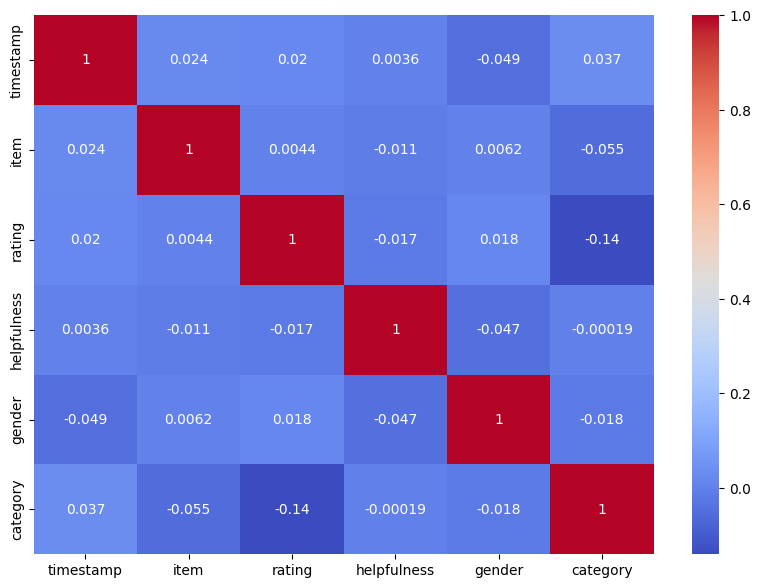

In [9]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(epinionsEncodeDF.corr(),
annot=True, cmap="coolwarm")

Explanation:
Currently, Category and Timestamp is the related feature to rating. As rating goes up, there is a positive effect in the timestamp while there is negative effect to category when rating goes upward.

In [10]:
epinionsEncodeDF.corr()

,timestamp,item,rating,helpfulness,gender,category
timestamp,1.000000,0.024337,0.019860,0.003638,-0.049244,0.037118
item,0.024337,1.000000,0.004414,-0.010780,0.006231,-0.054699
rating,0.019860,0.004414,1.000000,-0.016832,0.018105,-0.140576
helpfulness,0.003638,-0.010780,-0.016832,1.000000,-0.046627,-0.000189
gender,-0.049244,0.006231,0.018105,-0.046627,1.000000,-0.017644
category,0.037118,-0.054699,-0.140576,-0.000189,-0.017644,1.000000


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

<b>Note</b>: We also define random_state which corresponds to the seed, so that results are reproducible.
<br>We can also use the sklearn train_split_test but we'll use the code below for the meantime.

In [11]:
# your code and solution
#case 1
print('Case 1:')
case1TrainingData = epinionsEncodeDF.sample(frac=0.1, random_state=42)
case1TestingData = epinionsEncodeDF.drop(case1TrainingData.index)
print(f"No. of training examples: {case1TrainingData.shape[0]}")
print(f"No. of testing examples: {case1TestingData.shape[0]}")


#case 2
print('Case 2:')
case2TrainingData = epinionsEncodeDF.sample(frac=0.9, random_state=42)
case2TestingData = epinionsEncodeDF.drop(case2TrainingData.index)
print(f"No. of training examples: {case2TrainingData.shape[0]}")
print(f"No. of testing examples: {case2TestingData.shape[0]}")


Case 1:
No. of training examples: 290
No. of testing examples: 2609
Case 2:
No. of training examples: 2609
No. of testing examples: 290


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [12]:
#Case 1 - Model A
#import library first
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
regressor = LinearRegression()
# regressor = LogisticRegression()

For Case 1 Model A: based on the figure above, the closest feature that affects the rating is the category and the timestamp, so that one will be used.

In [13]:
x_train = case1TrainingData[['category','timestamp']].values
y_train = case1TrainingData['rating'].values
x_test = case1TestingData[['category','timestamp']].values
y_test = case1TestingData['rating'].values
case1ModelA = regressor.fit(x_train, y_train)
case1ModelAPrediction = case1ModelA.predict(x_test)
score = case1ModelA.score(x_test, y_test)*100
print("Accuracy Score:", score)

# check actual and predicted scores
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': case1ModelAPrediction.squeeze()})
print(df_preds)

# Evaluation
case1AMae = mean_absolute_error(y_test, case1ModelAPrediction)
case1AMsE = mean_squared_error(y_test, case1ModelAPrediction)
case1ARmse = np.sqrt(case1AMsE)
print(f'Mean absolute error: {case1AMae:.2f}')
print(f'Mean squared error: {case1AMsE:.2f}')
print(f'Root mean squared error: {case1ARmse:.2f}')

Accuracy Score: 1.6717309453273765
      Actual  Predicted
0        4.0   3.488426
1        5.0   3.566339
2        5.0   3.566339
3        5.0   3.566339
4        2.0   3.566339
...      ...        ...
2604     1.0   3.687163
2605     5.0   3.826810
2606     5.0   3.827049
2607     3.0   3.827287
2608     3.0   3.827287

[2609 rows x 2 columns]
Mean absolute error: 1.12
Mean squared error: 1.78
Root mean squared error: 1.34


For Case 1 Model B: based on the figure above, the fartheset feature that affects the rating is the helpfullness and the item, so that one will be used.

In [14]:
#Case 1 - Model B
x_train = case1TrainingData[['helpfulness','item']].values
y_train = case1TrainingData['rating'].values
x_test = case1TestingData[['helpfulness','item']].values
y_test = case1TestingData['rating'].values
case1ModelB = regressor.fit(x_train, y_train)
case1ModelBPrediction = case1ModelB.predict(x_test)
score = case1ModelB.score(x_test, y_test)*100
print("Accuracy Score:", score)

# check actual and predicted scores
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': case1ModelBPrediction.squeeze()})
print(df_preds)

# Evaluation
case1BMae = mean_absolute_error(y_test, case1ModelBPrediction)
case1BMsE = mean_squared_error(y_test, case1ModelBPrediction)
case1BRmse = np.sqrt(case1BMsE)
print(f'Mean absolute error: {case1BMae:.2f}')
print(f'Mean squared error: {case1BMsE:.2f}')
print(f'Root mean squared error: {case1BRmse:.2f}')

Accuracy Score: -0.0009857211960895285
      Actual  Predicted
0        4.0   3.650808
1        5.0   3.647838
2        5.0   3.656122
3        5.0   3.764837
4        2.0   3.646900
...      ...        ...
2604     1.0   3.776091
2605     5.0   3.773903
2606     5.0   3.652371
2607     3.0   3.656122
2608     3.0   3.647369

[2609 rows x 2 columns]
Mean absolute error: 1.14
Mean squared error: 1.81
Root mean squared error: 1.35


For Case 2 Model A: based on the figure above, the farthest feature that affects the rating is the category and the timestamp, so that one will be used.

In [15]:
#Case 2 - Model A
x_train = case2TrainingData[['category','timestamp']].values
y_train = case2TrainingData['rating'].values
x_test = case2TestingData[['category','timestamp']].values
y_test = case2TestingData['rating'].values
case2ModelA = regressor.fit(x_train, y_train)
case2ModelAPrediction = case2ModelA.predict(x_test)
score = case2ModelA.score(x_test, y_test)*100
print("Accuracy Score:", score)

# check actual and predicted scores
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': case2ModelAPrediction.squeeze()})
print(df_preds)

# Evaluation
case2AMae = mean_absolute_error(y_test, case2ModelAPrediction)
case2AMsE = mean_squared_error(y_test, case2ModelAPrediction)
case2ARmse = np.sqrt(case2AMsE)
print(f'Mean absolute error: {case2AMae:.2f}')
print(f'Mean squared error: {case2AMsE:.2f}')
print(f'Root mean squared error: {case2ARmse:.2f}')

Accuracy Score: 0.6751356215080495
     Actual  Predicted
0       5.0   3.649800
1       3.0   3.710800
2       5.0   3.711548
3       4.0   3.677092
4       5.0   3.531554
..      ...        ...
285     1.0   3.919657
286     1.0   3.684052
287     5.0   3.697902
288     5.0   4.045135
289     1.0   3.531213

[290 rows x 2 columns]
Mean absolute error: 1.14
Mean squared error: 1.86
Root mean squared error: 1.36


For Case 2 Model B: based on the figure above, the farthest feature that affects the rating is the helpfulness and the item, so that one will be used.

In [16]:
#Case 2 - Model B
x_train = case2TrainingData[['helpfulness','item']].values
y_train = case2TrainingData['rating'].values
x_test = case2TestingData[['helpfulness','item']].values
y_test = case2TestingData['rating'].values
case2ModelB = regressor.fit(x_train, y_train)
case2ModelBPrediction = case2ModelB.predict(x_test)
score = case2ModelA.score(x_test, y_test)*100
print("Accuracy Score:", score)

# check actual and predicted scores
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': case2ModelBPrediction.squeeze()})
print(df_preds)

# Evaluation
case2BMae = mean_absolute_error(y_test, case2ModelBPrediction)
case2BMsE = mean_squared_error(y_test, case2ModelBPrediction)
case2BRmse = np.sqrt(case1BMsE)
print(f'Mean absolute error: {case2BMae:.2f}')
print(f'Mean squared error: {case2BMsE:.2f}')
print(f'Root mean squared error: {case2BRmse:.2f}')

Accuracy Score: -0.1936768731393812
     Actual  Predicted
0       5.0   3.678705
1       3.0   3.689808
2       5.0   3.689808
3       4.0   3.660386
4       5.0   3.720609
..      ...        ...
285     1.0   3.685922
286     1.0   3.677040
287     5.0   3.658721
288     5.0   3.670378
289     1.0   3.756691

[290 rows x 2 columns]
Mean absolute error: 1.15
Mean squared error: 1.88
Root mean squared error: 1.35


In [17]:
# using sklearn split
from sklearn.model_selection import train_test_split
x=epinionsEncodeDF.copy().drop(columns=['rating','review']).values
y=epinionsEncodeDF['rating'].values
epinionsEncodeDF
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=25)
train_test_split = regressor.fit(x_train, y_train)
train_test_split.score(x_test, y_test)

0.01066312878072917

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [18]:
# your code and solution
# for case 1
# Evaluation
print('Case 1 - Model A Evaluation: ')
print(f'Mean absolute error: {case1AMae:.2f}')
print(f'Mean squared error: {case1AMsE:.2f}')
print(f'Root mean squared error: {case1ARmse:.2f}')

print('\nCase 1 - Model B Evaluation: ')
print(f'Mean absolute error: {case1BMae:.2f}')
print(f'Mean squared error: {case1BMsE:.2f}')
print(f'Root mean squared error: {case1BRmse:.2f}')

print('\nCase 2 - Model A Evaluation: ')
print(f'Mean absolute error: {case2AMae:.2f}')
print(f'Mean squared error: {case2AMsE:.2f}')
print(f'Root mean squared error: {case2ARmse:.2f}')

print('\nCase 2 - Model B Evaluation: ')
print(f'Mean absolute error: {case2BMae:.2f}')
print(f'Mean squared error: {case2BMsE:.2f}')
print(f'Root mean squared error: {case2BRmse:.2f}')


data = {'Model' : ['1A', '1B', '2A', '2B'], 'MAE': [case1AMae, case1BMae, case2AMae, case2BMae], 'MSE' : [case1AMsE, case1BMsE, case2AMsE, case2BMsE], 'RME': [case1ARmse, case1ARmse, case2ARmse, case2BRmse]}
evalDF = pd.DataFrame(data)
# check evalDF
evalDF

Case 1 - Model A Evaluation: 
Mean absolute error: 1.12
Mean squared error: 1.78
Root mean squared error: 1.34

Case 1 - Model B Evaluation: 
Mean absolute error: 1.14
Mean squared error: 1.81
Root mean squared error: 1.35

Case 2 - Model A Evaluation: 
Mean absolute error: 1.14
Mean squared error: 1.86
Root mean squared error: 1.36

Case 2 - Model B Evaluation: 
Mean absolute error: 1.15
Mean squared error: 1.88
Root mean squared error: 1.35


,Model,MAE,MSE,RME
0,1A,1.124595,1.784589,1.335885
1,1B,1.140284,1.814947,1.335885
2,2A,1.136199,1.861556,1.364388
3,2B,1.152919,1.877839,1.347200


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

<AxesSubplot:xlabel='Model'>

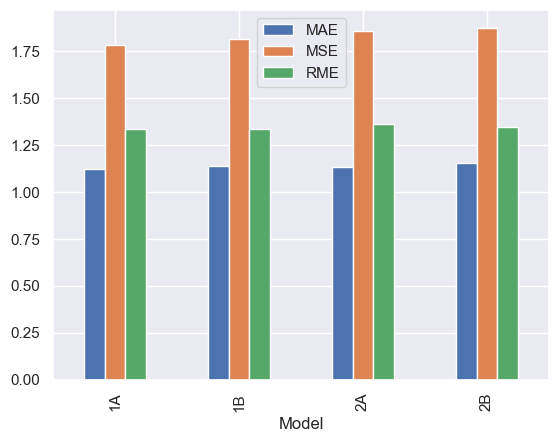

In [19]:
# your code and solution
sns.set()  # use Seaborn styles
evalDF.pivot_table(index="Model").plot(kind='bar')

## Conclusion

By obersiving the metrics currently, it is found out that Case 1 Model A got the better metric for against 3 other cases. This basically means that Case 1 Model A proves that the feature selected are better compare to using the least correlated feature for the training. However, comparing it to the Case 2 Model A, the Case 2 Model A performed poorly in general observation of unforseen data. This may due to the fact that we tested to a relatively low test set. If we try to perform the same performance test using the Case 1 Model A test set, we could see the following:

In [20]:
#Case 2 - Model A
x_train = case2TrainingData[['category','timestamp']].values
y_train = case2TrainingData['rating'].values

#check testing for model 1 case A
x_test = case1TestingData[['category','timestamp']].values
y_test = case1TestingData['rating'].values
case2ModelA = regressor.fit(x_train, y_train)
case2ModelAPrediction = case2ModelA.predict(x_test)
score = case2ModelA.score(x_test, y_test)*100

# Evaluation
case2AMae = mean_absolute_error(y_test, case2ModelAPrediction)
case2AMsE = mean_squared_error(y_test, case2ModelAPrediction)
case2ARmse = np.sqrt(case2AMsE)
data = {'Model' : ['1A', '2A'], 'MAE': [case1AMae, case2AMae], 'MSE' : [case1AMsE, case2AMsE], 'RME': [case1ARmse, case2ARmse]}
compareC1AtoC2ADF = pd.DataFrame(data)
compareC1AtoC2ADF

,Model,MAE,MSE,RME
0,1A,1.124595,1.784589,1.335885
1,2A,1.118930,1.775917,1.332635


<AxesSubplot:xlabel='Model'>

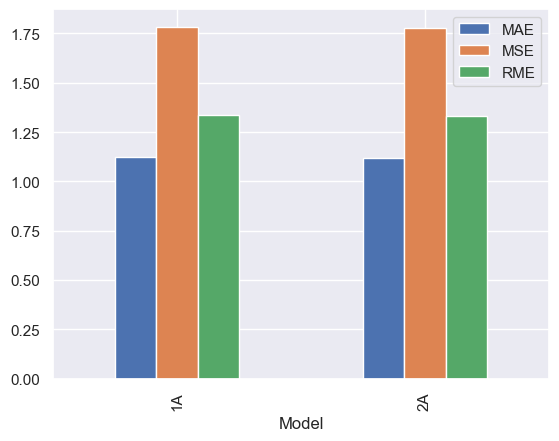

In [21]:
sns.set()  # use Seaborn styles
compareC1AtoC2ADF.pivot_table(index="Model").plot(kind='bar')

## Conclusion (cont.)

As seen above, the Case 2 Model A performed marginally better than the Case 1 Model A. Although, this could also be consider a slight anomaly because the more likely, some of the records from the Case 1 Model A has been seen by the model during the training of the Case 2 Model A.